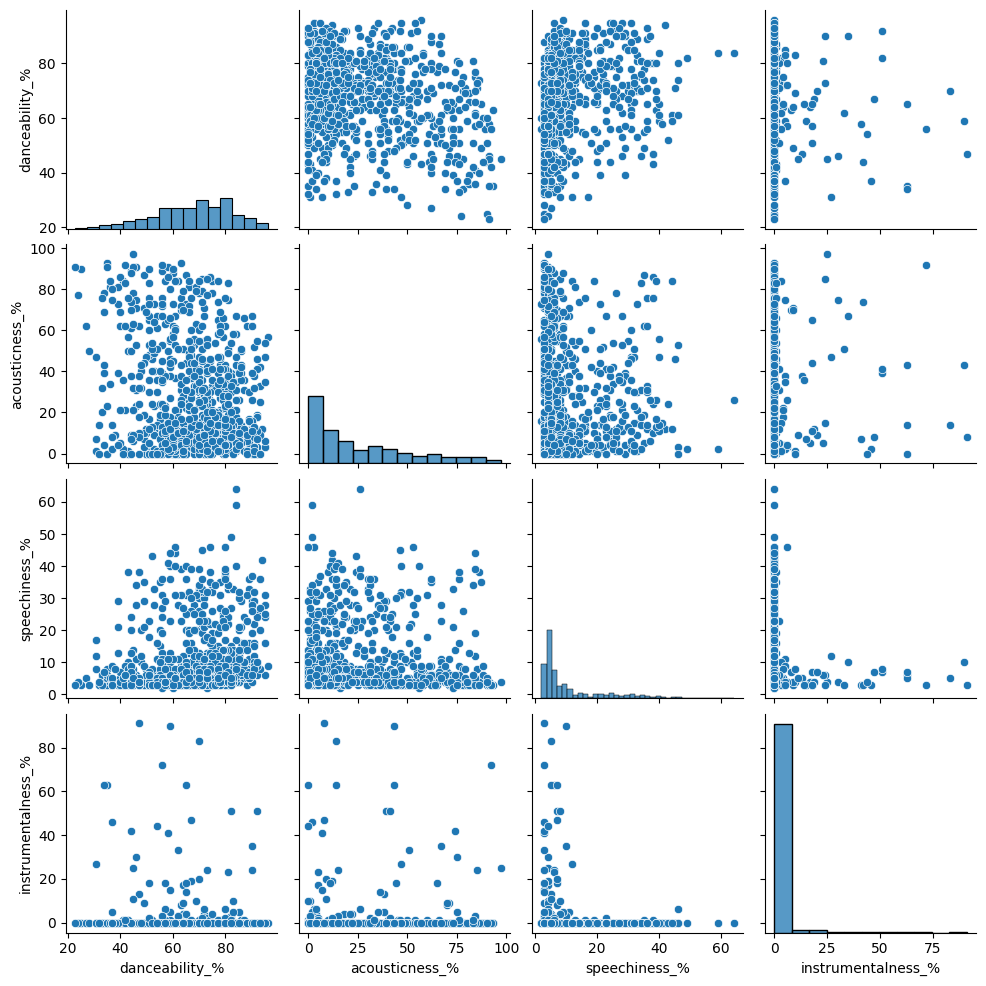

In [43]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Specify the file path
file_path = "spotify-2023.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
# df["danceability_p"]

df.dropna(inplace=True)
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')


features = ['danceability_%', 'acousticness_%', 'speechiness_%', 'instrumentalness_%']
sns.pairplot(df[features])
plt.show()


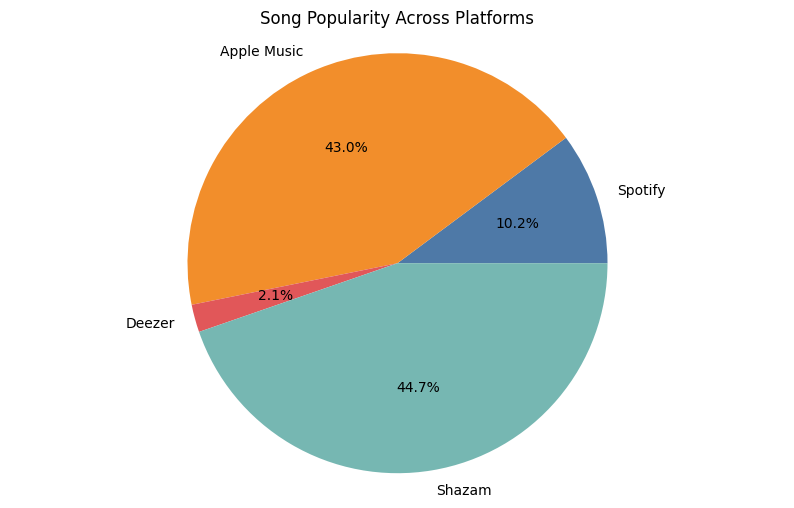

In [72]:
import matplotlib.pyplot as plt

# Assuming platform_totals dictionary is populated as in your example
platform_totals = {
    'Spotify': df['in_spotify_charts'].sum(),
    'Apple Music': df['in_apple_charts'].sum(),
    'Deezer': df['in_deezer_charts'].sum(),
    'Shazam': df['in_shazam_charts'].sum()
}

platforms = list(platform_totals.keys())
values = list(platform_totals.values())

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(values, labels=platforms, autopct='%1.1f%%', colors=["#4e79a7", "#f28e2b", "#e15759", "#76b7b2", "#59a14f"])
plt.title('Song Popularity Across Platforms')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


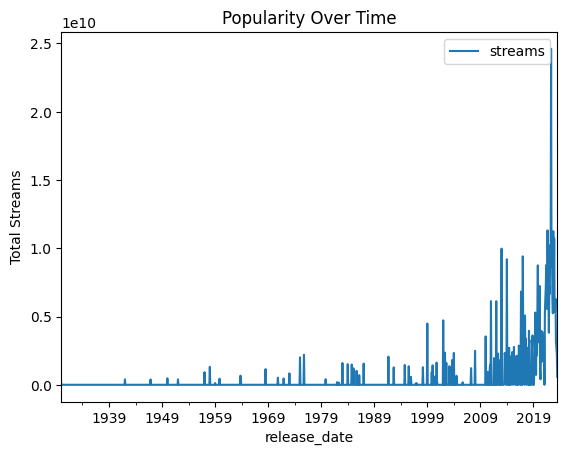

In [15]:
df['release_date'] = pd.to_datetime(df['released_year'].astype(str) + '-' + df['released_month'].astype(str) + '-' + df['released_day'].astype(str))
df.set_index('release_date', inplace=True)

df.resample('M')[['streams']].sum().plot()  # Summing streams monthly
plt.title('Popularity Over Time')
plt.ylabel('Total Streams')
plt.show()


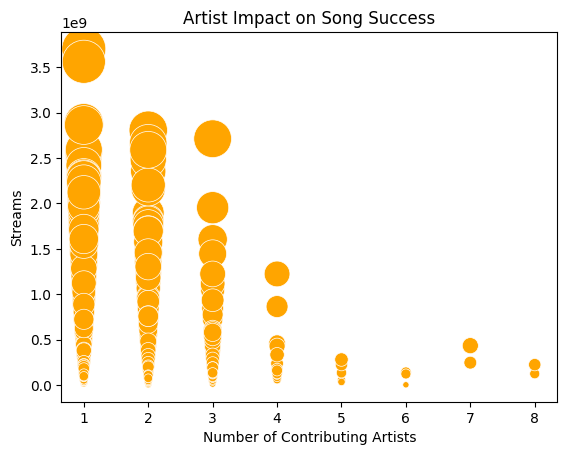

In [28]:
sns.scatterplot(data=df, x='artist_count', y='streams', size='streams', legend=False, sizes=(20, 1000), color='orange')
plt.title('Artist Impact on Song Success')
plt.xlabel('Number of Contributing Artists')
plt.ylabel('Streams')
plt.show()


In [2]:
import pandas as pd

# Specify the file path
file_path = "data/updated_file.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

df['bpm'].unique()


array([125,  92, 138, 170, 144, 141, 148, 100, 130,  83, 150, 118, 174,
        89, 120,  78, 140, 123, 135, 133,  99, 107, 122, 204, 110, 126,
       168,  98,  97, 180,  96,  95,  90, 128,  79, 134, 186,  67, 106,
       171, 137, 101, 173, 198,  82,  81,  94, 124, 132, 131, 102, 142,
       116, 129, 172, 136,  88, 143, 112,  93, 206,  84, 158, 117, 114,
       108, 121, 127, 139, 162, 146, 115, 119,  80, 160, 192, 163, 154,
       104, 164, 145,  85, 166, 109, 157,  74, 105, 155, 149, 169,  91,
       202, 153, 178, 176, 111, 182, 175,  87,  76, 113,  77, 177, 147,
        75, 103, 151, 152,  65, 179,  86,  73, 181, 161,  72, 184,  71,
       189, 200, 196, 188, 156, 183, 165])